### Welcome to the first practical workshop of the serie ! 

#### PACKAGES : 

Before starting your journey, you will need a couple of tools. Here is what you will need ! 

<ul>
    <li>Tensorflow</li>
    <li>Numpy</li>
    <li>matplotlib</li>
 </ul>

### Importing what we need 

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

### Downloading 

Let's now download the dataset we need in order to start working !

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


### Let's verify and display the data we have.

<strong>Look</strong>, we splitted our mnist dataet (all (image,label) couples) into 2 seperates sets.  <br> They are called training and testing set. 
We will train the model with the training set, and evaluate the model on the test set ! 


In [3]:
# accessing the shape of any numpy array with my_numpy_array.shape
print("x_train has shapes", x_train.shape) # a 60000 x 28 x 28 numpy array 

x_train has shapes (60000, 28, 28)


### Dimensions : 

### The first dimension, 60000, denotes the number of element 
### The second dimension, 28, and the third, 28, denote the height and the width of the images ! 

minimum value 0
maximum value 255


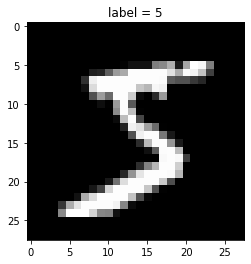

In [4]:
# selecting the first image of our dataset 

img = x_train[0]
print("minimum value", np.min(img))
print("maximum value", np.max(img))
# let's display the image
plt.imshow(img, cmap="gray") 
plt.title(f"label = {str(y_train[0])}") # the image's label
plt.show()

### Let's explore more images ! 

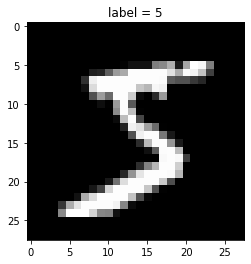

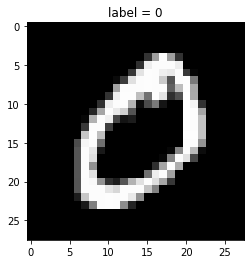

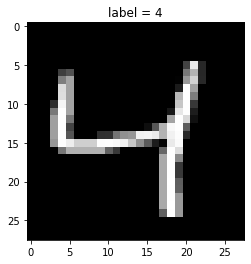

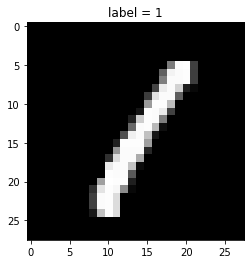

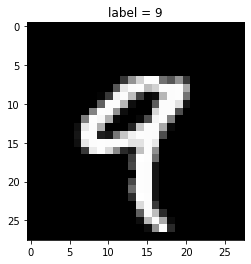

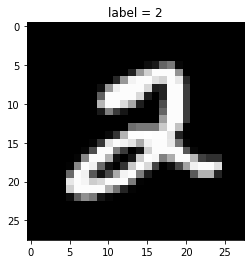

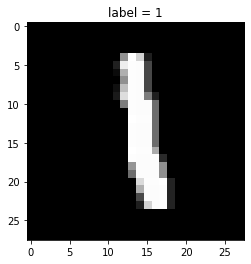

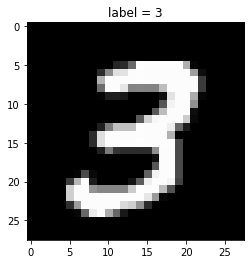

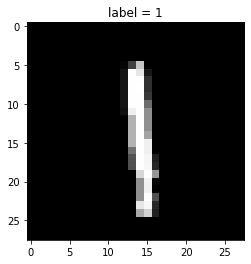

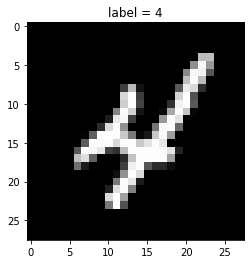

In [5]:
for i in range(10): 
    img = x_train[i]
    # let's display the image
    plt.imshow(img, cmap="gray") 
    plt.title(f"label = {str(y_train[i])}") # the image's label
    plt.show()

### our images have the following dimensions : (28,28). If you remember, we want does image to be reshaped, as a vector of size (28*28,) ! 


In [6]:

x_train = np.reshape(x_train, newshape=[x_train.shape[0], -1]) 
x_test = np.reshape(x_test, newshape=[x_test.shape[0], -1])

In [7]:
# let's check the shape of our datasets
print("x_train new shapes", x_train.shape) 
print("x_test new shapes", x_test.shape)


x_train new shapes (60000, 784)
x_test new shapes (10000, 784)


#### At this point, we are done with shaping the input of our neural network and we replicated this process : 
<img src="img/input.gif" style="width:600px;height:300px;">

## Encoding the labels in order to train our model ! ONE HOT ENCODING ! 

#### one hot encoding is a very simple principle that does this : 


<img src="img/one_hot.jpg" style="width:600px;height:300px;">

In [8]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#### Our labels now look like this : 

In [9]:
print(y_train[:10]) # only displaying the first 10 labels
print("new y_train shape", y_train.shape) 
print("new y_test shape", y_test.shape)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
new y_train shape (60000, 10)
new y_test shape (10000, 10)


### We are ready to build our model ! 

But first, let's do a quick summary of what we have done so far. 
We : 

<ul>
    <li>Downloaded the dataset using keras</li>
    <li>Added one dimension because keras only takes 3D images</li>
    <li>We used one hot encoding in order to encode our labels </li>
</ul>

### Option 1 : Using the sequential module !

The <strong>tf.keras.sequential</strong> module, allows us to simply mention all the layers and units we need in our neural network ! 

In [10]:
input_shape = x_train.shape[1:]

In [11]:
# creating a neural network
my_dnn = tf.keras.Sequential([
    # the entry point is our input ! We need to specify the shape of this input 
    tf.keras.Input(shape=input_shape),
    # We can now add our layers ! 
    tf.keras.layers.Dense(16), 
    tf.keras.layers.Dense(16), 
    tf.keras.layers.Dense(10)
])

2021-11-24 17:59:09.153590: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 17:59:09.622390: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 17:59:09.622882: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 17:59:09.623942: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

#### Let's make sure it is working ! my_model.summary() allows you to summarize all the informations of your model ! 
#### It is really useful when it comes to debugging your model ! 

In [12]:
my_dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


#### At this point, our neural network looks like this  : 

<img src="img/nn.png" style="width:300px;height:300px;">

## Let's train the model ! 

#### To train the model, we will need to following informations : 


<ul>
    <li>The of iterations are neural network is going to perform before stopping</li>
    <li>The batch size : number of elements by epoch</li>
    <li>The learning rate : 0.01, 0.001, 0.0001, ... let's experiment ! 
</ul>

## These 3 elements are known as Hyper-Parameters ! We are not learning them (unlike weights), but we need to hard code them ! 

In [13]:
epochs = 10 
batch_size = 8 # 8 images each iteration
lr = 0.001 # learning rate

#### Let's tell our neural network that we want to use : 

<ul>
<li>loss : crossentropy loss</li>
<li>optimizer : an optimization algorithm the minimize our loss (here we will go with a vanilla gradient descent)</li> 
<li>the metric we are interested in </li> 
</ul>

In [14]:
# Calling comile in order to setup the training
optimizer = tf.keras.optimizers.SGD(
    learning_rate=lr, momentum=0.0
)
my_dnn.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## It's training time !!! 

#### We need to tell keras about : 

<ul>
    <li>The images and labels we will use to train the neural network </li> 
    <li>The batch size</li> 
    <li>The number of epochs </li>
</ul>

In [15]:
my_dnn.fit(    
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
)

2021-11-24 17:59:11.905416: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
7500/7500 [==============================] - 9s 1ms/step - loss: 10.2702 - accuracy: 0.0992
Epoch 2/10
7500/7500 [==============================] - 8s 1ms/step - loss: 10.2988 - accuracy: 0.0992
Epoch 3/10
7500/7500 [==============================] - 9s 1ms/step - loss: 10.2988 - accuracy: 0.0992
Epoch 4/10
7500/7500 [==============================] - 9s 1ms/step - loss: 10.2988 - accuracy: 0.0992
Epoch 5/10
7500/7500 [==============================] - 8s 1ms/step - loss: 10.2988 - accuracy: 0.0992
Epoch 6/10
7500/7500 [==============================] - 8s 1ms/step - loss: 10.2988 - accuracy: 0.0992
Epoch 7/10
7500/7500 [==============================] - 8s 1ms/step - loss: 10.2988 - accuracy: 0.0992
Epoch 8/10
7500/7500 [==============================] - 9s 1ms/step - loss: 10.2988 - accuracy: 0.0992
Epoch 9/10
7500/7500 [==============================] - 9s 1ms/step - loss: 10.2988 - accuracy: 0.0992
Epoch 10/10
7500/7500 [==============================] - 9s 1ms/step - lo